## Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the no of hours they studied.


### Step 1 : Reading and Understanding the Data

Lets start with the following steps:
    1. Importing the data using the pandas library
    2. Understanding the structure of the data

In [1]:
#Importing the required libraries

import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

#supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data and inspect the head

data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Lets inspect various aspects of our dataframe
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#lets check if there is any missing values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Our data has no missing values. lets proceed with visualising the data

### Step 2 : Visualising the Data

Lets visualise our data using seaborn library. We can check if there is any relationship between the variables.

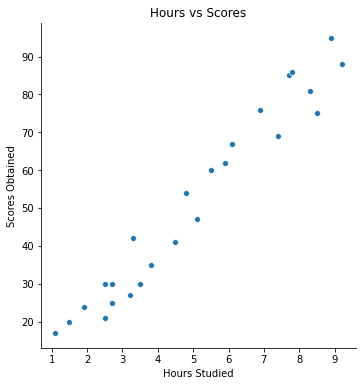

In [7]:
sns.pairplot(data, x_vars ='Hours', y_vars='Scores',size= 5, aspect=1, kind='scatter')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

From this plot we can see there is a positive linear relationship between the no of `Hours Studied` and `Scores Obtained`

### Step 3: Model Building

In [8]:
#lets divide the data into X,y
X = data.iloc[:,:-1].values
y= data.iloc[:,1].values

In [9]:
#splitting the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

In [10]:
X_train.shape

(20, 1)

In [11]:
# importing the sklearn library for linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [12]:
#lets check the intercept and coefficient values
print(lr.intercept_)
print(lr.coef_)

2.018160041434683
[9.91065648]


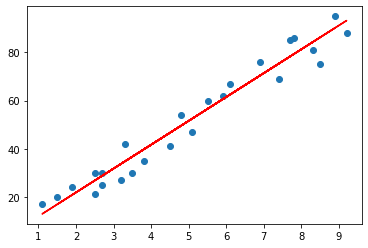

In [13]:
#plotting the regression line

line = lr.coef_ *X +lr.intercept_

plt.scatter(X,y)
plt.plot(X, line,'r')
plt.show()

### Step 4 -  Making Predictions

In [14]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#lets make predictions on our test set
y_pred = lr.predict(X_test)
prediction = pd.DataFrame({'Hours': y_test, 'Predicted Scores':y_pred})
prediction

,Hours,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#lets find out the predicted score if a student studies for '9.25 hours' per day
hours = 9.25
own_pred = lr.predict([[hours]])
print('No of hours = {}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


### Step 5 - Model Evaluation

In [17]:
#lets evaluate the model using MSE and R2 score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [18]:
mse = mean_squared_error(y_test,y_pred)
mse

21.5987693072174

In [19]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.9454906892105356